# King County Housing Model
<img src=images/row-of-houses.jpg alt="image of a string of paper houses by u_f8awlsnb on Pixabay" width="500"/>

## Overview


The King County House Sales dataset is used to build a linear regression model to help home buyers make tradeoffs in finding their next home within their budget. The biggest factor in determining price is the location of the home with some zipcodes increasing the house by over 100%, while others will decrease the price by 40%. Other important features were square footage, number of bathrooms and whether the home had been renovated. This model accounts for 85% of the variability in house prices, but could be further refined with more thorough data preparation before building it out into an application for buyers to use to see how their preferred home features affect the price. 





## Business Problem

<img src=images/Dog-house.jpg alt="editorial cartoon of couple house hunting in seattle looking at the affordable dog house, by David Horsey in the Seattle Times" width="500"/>

Seattle is the fastest growing city in the country, with a population increase of almost 30% from 2010 to 2020. The surrounding King County ranks 3rd in the country for growth with a population growth of 16% in the same time. All this growth has increased demand for housing and caused home prices to skyrocket. The median house price in Seattle rose 93% from 2012-2018. 

This is a difficult market for home buyers, so this project will help buyers decide what trade-offs are worthwhile to find the best house for their needs in their price range. 

## Data Understanding

The data for this project represent home sales in King County, Washington between May 2014 and May 2015. The dataset includes basic house information such as the number of bedrooms & bathrooms, total area of the living space (divided into basement and above ground) & the lot, and year it was built, sales information like price & number of times it was viewed, and neighborhood information, like zipcode and information about the house and lot size of the 15 nearest neighbors.

I will use this data to build a model that will predict house prices based on the available variables.



In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import utils as ut

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.feature_selection import RFE
from sklearn.preprocessing import RobustScaler
from sklearn.dummy import DummyRegressor
from sklearn.neighbors import LocalOutlierFactor

from yellowbrick.regressor import ResidualsPlot

import statsmodels.api as sm

pd.set_option('display.float_format', lambda x: f'{x:.2f}')
%matplotlib inline
plt.style.use('seaborn-darkgrid')

In [3]:
# Load and look at data
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,nan,0.00,...,7,1180,0.0,1955,0.00,98178,47.51,-122.26,1340,5650
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,0.00,0.00,...,7,2170,400.0,1951,1991.00,98125,47.72,-122.32,1690,7639
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,0.00,0.00,...,6,770,0.0,1933,nan,98028,47.74,-122.23,2720,8062
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,0.00,0.00,...,7,1050,910.0,1965,0.00,98136,47.52,-122.39,1360,5000
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,0.00,0.00,...,8,1680,0.0,1987,0.00,98074,47.62,-122.05,1800,7503


In [4]:
data.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,19221.00,21534.00,21597.00,21597.00,21597.00,21597.00,17755.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,4580474287.77,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.01,0.23,3.41,7.66,1788.60,1971.00,83.64,98077.95,47.56,-122.21,1986.62,12758.28
std,2876735715.75,367368.14,0.93,0.77,918.11,41412.64,0.54,0.09,0.77,0.65,1.17,827.76,29.38,399.95,53.51,0.14,0.14,685.23,27274.44
min,1000102.00,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,0.00,1.00,3.00,370.00,1900.00,0.00,98001.00,47.16,-122.52,399.00,651.00
25%,2123049175.00,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,0.00,3.00,7.00,1190.00,1951.00,0.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,3904930410.00,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,0.00,3.00,7.00,1560.00,1975.00,0.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,7308900490.00,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,0.00,4.00,8.00,2210.00,1997.00,0.00,98118.00,47.68,-122.12,2360.00,10083.00
max,9900000190.00,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,1.00,4.00,5.00,13.00,9410.00,2015.00,2015.00,98199.00,47.78,-121.31,6210.00,871200.00


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(11), object(2)
memory usage: 3.5+ MB


## Data Preparation

From the data exploration, I see that most features are numerical and have no null values. The features that need attention are 'sqft_basement' which should be a float, but is listed as an object, and 'yr_renovated' and 'waterfront' have null values that need to be addressed. I do not plan to use the 'id', 'date', or 'view' features, so will not address their issues.

In [6]:
# To determine why 'sqft_basement' is an object dtype, I first look at the unique values. 
data['sqft_basement'].unique()

array(['0.0', '400.0', '910.0', '1530.0', '?', '730.0', '1700.0', '300.0',
       '970.0', '760.0', '720.0', '700.0', '820.0', '780.0', '790.0',
       '330.0', '1620.0', '360.0', '588.0', '1510.0', '410.0', '990.0',
       '600.0', '560.0', '550.0', '1000.0', '1600.0', '500.0', '1040.0',
       '880.0', '1010.0', '240.0', '265.0', '290.0', '800.0', '540.0',
       '710.0', '840.0', '380.0', '770.0', '480.0', '570.0', '1490.0',
       '620.0', '1250.0', '1270.0', '120.0', '650.0', '180.0', '1130.0',
       '450.0', '1640.0', '1460.0', '1020.0', '1030.0', '750.0', '640.0',
       '1070.0', '490.0', '1310.0', '630.0', '2000.0', '390.0', '430.0',
       '850.0', '210.0', '1430.0', '1950.0', '440.0', '220.0', '1160.0',
       '860.0', '580.0', '2060.0', '1820.0', '1180.0', '200.0', '1150.0',
       '1200.0', '680.0', '530.0', '1450.0', '1170.0', '1080.0', '960.0',
       '280.0', '870.0', '1100.0', '460.0', '1400.0', '660.0', '1220.0',
       '900.0', '420.0', '1580.0', '1380.0', '475.0', 

The unique values of 'sqft_basement' are mostly numbers, but also includes '?'. To change the dtype to float, I first assign the '?'s to a null value.

In [7]:
data.loc[data['sqft_basement'] == '?', 'sqft_basement'] = np.nan
data.sqft_basement = data.sqft_basement.astype(float)

# To determine what the null values should be, I look at the number of null values and how many rows
# have the total living space (sqft_living) equal to the sum of the basement(sqft_basement) and 
# above ground (sqft_above) living space.

print(data['sqft_basement'].isna().sum())
print((data['sqft_living'] == data['sqft_basement'] + data['sqft_above']).sum())

454
21143


The sum of null values (454) and those rows where sqft_living = sqft_basement + sqft_above (21143) equals 21597- the total number of rows. This indicates that the NaNs are probably not zeros. So, I replace the null values with the total sqft_living minus sqft_above, then confirm that the sqft_living is equal to sqft_basement plus sqft_above for all rows.

In [8]:
data['sqft_basement'] = data['sqft_basement'].fillna(data['sqft_living'] - data['sqft_above'])
(data['sqft_living'] == data['sqft_basement'] + data['sqft_above']).sum()

21597

'Waterfront' is a categorical feature and there isn't a clear answer to where the null values should go. Instead of trying to guess or otherwise determine if the null values are waterfront or not, I create a new category 'Unknown'. I change the numbers '0' and '1' to 'No' and 'Yes' respectively, for continutity of naming in the feature.

In [9]:
# Change '0' to 'No', '1' to 'Yes', and 'nan' to 'unknown'
data['waterfront'] = data.loc[data['waterfront']==0, 'waterfront']= 'No'
data['waterfront'] = data.loc[data['waterfront']==1, 'waterfront']= 'Yes'
data['waterfront'] = data['waterfront'].fillna('Unknown')

The 'yr_renovated' feature has some null values. To get a better sense of the feature, I first look at the count of unique values

In [10]:
data['yr_renovated'].value_counts()

0.00       17011
2014.00       73
2003.00       31
2013.00       31
2007.00       30
           ...  
1946.00        1
1959.00        1
1971.00        1
1951.00        1
1954.00        1
Name: yr_renovated, Length: 70, dtype: int64

The 'yr_renovated' feature has a high number of zeros, which are likely homes that have not been renovated. It seems likely that the null values are also unrenovated homes, as it is an important selling point. Thus, I change the zeros to null values to see how many homes have been renovated.

In [11]:
# yr_renovated has a high number of '0's, which seems like the same as a nan, so change '0' to nan
data.loc[data['yr_renovated']== 0.0, 'yr_renovated'] = np.nan
data['yr_renovated'].notnull().sum()

744

There are now only 744 rows with yr_renovated values out of over 20,000 total rows. This seems like a column that would work better as a categorical feature. I want to preserve the 'yr_renovated' numbers in case they are usefull later, so I add new column 'renovated' as categorical feature with the values of 'RR' recently renovated(last 10 years), 'R' renovated, and 'NR' not renovated.

In [12]:
# Add new column based on 'yr_renovated' column with values RR' recently renovated(last 10 years),
# 'R' renovated, and 'NR' not renovated.
data['renovated'] = np.where(data['yr_renovated']=='NaN', 'NR',
                             np.where(data['yr_renovated']<2005, 'R', 'RR'))


/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/pandas/core/ops/__init__.py:1115: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  result = method(y)


In [13]:
# Check that null values have been dealt with and the dtypes are as expected
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 22 columns):
id               21597 non-null int64
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       21597 non-null object
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null float64
yr_built         21597 non-null int64
yr_renovated     744 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
renovated        21597 non-null object
dtypes: float64(8), int64(11), object(

Before moving on to models, I look for multicolinearity between my numerical features to determine which features should not be used.

In [14]:
# List numerical features
numerical = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
              'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 
              'lat', 'long', 'zipcode', 'sqft_living15', 'sqft_lot15']

# New dataframe of numberical features only
data_num = data[numerical]

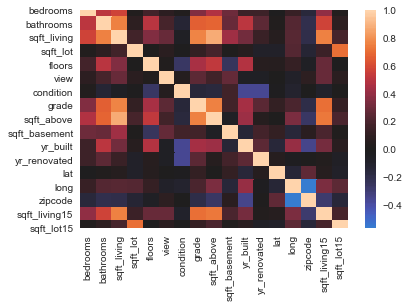

In [15]:
# Create a heat map of correlations between numerical features
sns.heatmap(data_num.corr(), center=0);

In [16]:
# Create a df that will list the highly correlated features (correlation greater than 0.75)                           
df = data_num.corr().abs().stack().reset_index()
df.columns = ['feature1', 'feature2', 'corr']
df[(df['corr']>.75) & (df['corr'] <1)]

,feature1,feature2,corr
19,bathrooms,sqft_living,0.76
35,sqft_living,bathrooms,0.76
41,sqft_living,grade,0.76
42,sqft_living,sqft_above,0.88
49,sqft_living,sqft_living15,0.76
121,grade,sqft_living,0.76
127,grade,sqft_above,0.76
138,sqft_above,sqft_living,0.88
143,sqft_above,grade,0.76
257,sqft_living15,sqft_living,0.76


The features 'sqft_living' and 'grade' highly correlate with other features. They both have other similar features, 'sqft_above' & 'sqft_basement' for 'sqft_living', and 'condition' for 'grade'. So they will not be used.

### First Model

Will do a first model with the data as it has been processed so far. For this model, I will not use 'grade' & 'sqft_living' due to their colinearity with multiple other features, 'yr_renovated' has been transformed into the categorical 'renovated' feature and 'id' isn't a feature that would be related to the home's price. I may come back to the 'date', 'lat', & 'long' features in a later model, as they could be related to price and are somewhat under the control of a home buyer. 

I create a baseline, model-less prediction and begin evaluate this model compared to that baseline.

In [17]:
# Divide data into continuous and categorical features. 
categoricals = ['waterfront', 'renovated', 'zipcode']
continuous = ['sqft_lot', 'sqft_lot15', 'sqft_living15', 'yr_built', 'condition',
              'bedrooms', 'bathrooms', 'sqft_above', 'sqft_basement', 'floors', 'price']
cat_data = data[categoricals]
cont_data = data[continuous]              

In [18]:
# One hot encode the categorical features, concatenate them with the continuous dataframe,
# then split the dataframe into the explanatory features, X, and target feature, y.
X, y = ut.ohe_concat(cat_data, cont_data, categoricals, 'price')

In [19]:
# Split the data into a training sets and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=9)

First, a baseline model using the mean of y_train values.

In [20]:
# Instantiate a dummy model that uses the mean of y_train as the predicted values
dummy_reg = DummyRegressor(strategy='mean')

# Fit the model with the training data
dummy_reg.fit(X_train, y_train)

# Get preditions on testing data and compare to the Y_test data set and print results
ut.predictions(dummy_reg, X_train, X_test, y_train, y_test)

Training Scores: R2 0.00000, Mean Absolute Error 231762.41, Root Mean Squared Error 364535.32
Testing Scores: R2 -0.00185, Mean Absolute Error 238904.74, Root Mean Squared Error 378514.19


As expected, the R2 value is zero. Now, I create a first model using the y_training data to train the model.

In [21]:
# Instantiate LinearRegression
linreg = LinearRegression()

# Fit the model with the training data
linreg.fit(X_train, y_train)

# Get preditions on testing data and compare to the Y_test data set and print results
ut.predictions(linreg, X_train, X_test, y_train, y_test)

Training Scores: R2 0.75135, Mean Absolute Error 106131.10, Root Mean Squared Error 181773.90
Testing Scores: R2 0.75191, Mean Absolute Error 108955.77, Root Mean Squared Error 188359.97


#### Evaluation 1

This first model can explain 75% of the variance of house prices in the test data. The training and test R2 values are almost the same, so the model seems to be well fit. The root mean squared error (rmse) is 72% higher than the mean absolute error (mae), which indicates that there are some predicted values that are large. Compared to the baseline model, the error has been cut in half.

In [22]:
# Run an Ordinary Least Squares model and get a results summary
ut.ols_summary(X_train, y_train, X)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.751
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     649.5
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:12:24   Log-Likelihood:            -2.3375e+05
No. Observations:               17277   AIC:                         4.677e+05
Df Residuals:                   17196   BIC:                         4.683e+05
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
waterfront_Yes  8.122e+05    9.9e+04      8.201      0.000    6.18e+05    1.01e+06
renovated_R     4.344e+05   4.87e+04      8.921      0.000    3.39e+05     5.3e+05
renovated_RR    3.778e+05   5.08e+04      7.435      0.000    2.78e+05    4.77e+05
zipcode_98001  -2.047e+05   1.11e+04    -18.444      0.000   -2.27e+05   -1.83e+05
zipcode_98002  -1.815e+05   1.45e+04    -12.479      0.000    -2.1e+05   -1.53e+05
zipcode_98003  -2.005e+05    1.2e+04    -16.737      0.000   -2.24e+05   -1.77e+05
zipcode_98004   5.732e+05   1.19e+04     48.195      0.000     5.5e+05    5.96e+05
zipcode_98005   9.456e+04   1.61e+04      5.872      0.000     6.3e+04    1.26e+05
zipcode_98006   9.159e+04   9760.182      9.384      0.000    7.25e+04    1.11e+05
zipcode_98007    4.49e+04   1.73e+04      2.602      0.009    1.11e+04    7.87e+04
zipcode_98008   8.077e+04   1.22e+04      6.602      0.000    5.68e+04    1.05e+05
zipcode_98010  -1.562e+05   2.03e+04     -7.699      0.000   -1.96e+05   -1.16e+05
zipcode_98011  -9.419e+04   1.43e+04     -6.590      0.000   -1.22e+05   -6.62e+04
zipcode_98014   -1.17e+05   1.85e+04     -6.330      0.000   -1.53e+05   -8.07e+04
zipcode_98019  -1.342e+05   1.53e+04     -8.799      0.000   -1.64e+05   -1.04e+05
zipcode_98022  -1.911e+05    1.4e+04    -13.674      0.000   -2.18e+05   -1.64e+05
zipcode_98023   -2.27e+05   9362.258    -24.249      0.000   -2.45e+05   -2.09e+05
zipcode_98024  -7.137e+04   2.22e+04     -3.219      0.001   -1.15e+05   -2.79e+04
zipcode_98027  -3.508e+04   1.03e+04     -3.417      0.001   -5.52e+04    -1.5e+04
zipcode_98028  -8.246e+04   1.22e+04     -6.769      0.000   -1.06e+05   -5.86e+04
zipcode_98029   1.304e+04   1.19e+04      1.097      0.273   -1.03e+04    3.63e+04
zipcode_98030  -2.065e+05   1.31e+04    -15.728      0.000   -2.32e+05   -1.81e+05
zipcode_98031  -1.943e+05   1.26e+04    -15.384      0.000   -2.19e+05    -1.7e+05
zipcode_98032  -1.874e+05   1.77e+04    -10.610      0.000   -2.22e+05   -1.53e+05
zipcode_98033   1.808e+05      1e+04     18.082      0.000    1.61e+05       2e+05
zipcode_98034   1.899e+04   8897.938      2.134      0.033    1549.474    3.64e+04
zipcode_98038  -1.945e+05   8875.240    -21.917      0.000   -2.12e+05   -1.77e+05
zipcode_98039   1.145e+06   2.81e+04     40.794      0.000    1.09e+06     1.2e+06
zipcode_98040    3.45e+05   1.27e+04     27.112      0.000     3.2e+05     3.7e+05
zipcode_98042  -2.051e+05   8951.330    -22.916      0.000   -2.23e+05   -1.88e+05
zipcode_98045  -1.041e+05   1.39e+04     -7.516      0.000   -1.31e+05    -7.7e+04
zipcode_98052   2.797e+04   8892.118      3.146      0.002    1.05e+04    4.54e+04
zipcode_98053  -3.328e+04   1.08e+04     -3.092      0.002   -5.44e+04   -1.22e+04
zipcode_98055  -1.656e+05   1.26e+04    -13.187      0.000    -1.9e+05   -1.41e+05
zipcode_9805

The skew and kurtosis are both higher than desired, indicating the data is right skewed and there is a high number of outliers. The p-values for almost all features are significant and the p-value for the F-statistic is significant as well, indicating that we can reject the null hypothesis and say that the model fits the data. 

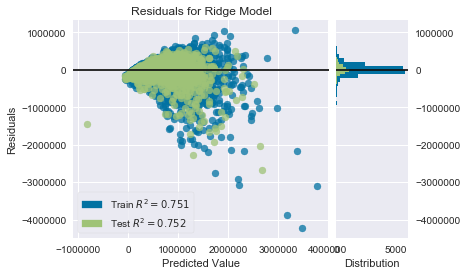

In [23]:
# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)
# Fit the training data
visualizer.fit(X_train, y_train) 
# Score the test data
visualizer.score(X_test, y_test)
# Plot the residuals
visualizer.show()  

The residuals plot shows that the results have high heteroskedasticity, showing that the model does a better job of predicting small values compared to larger values.

###  Iteration 2

In this iteration, I will address the skewness and heteroskedasticity of the initial model by normalizing and scaling data using a method that will help with the outliers. 

#### Data Preparation 2
I will use the same features as the first model, so will start by using the categorical dataframe (cat_data) and continuous dataframe (cont_data) as the starting point. I start by checking the continuous data for normal distributions.

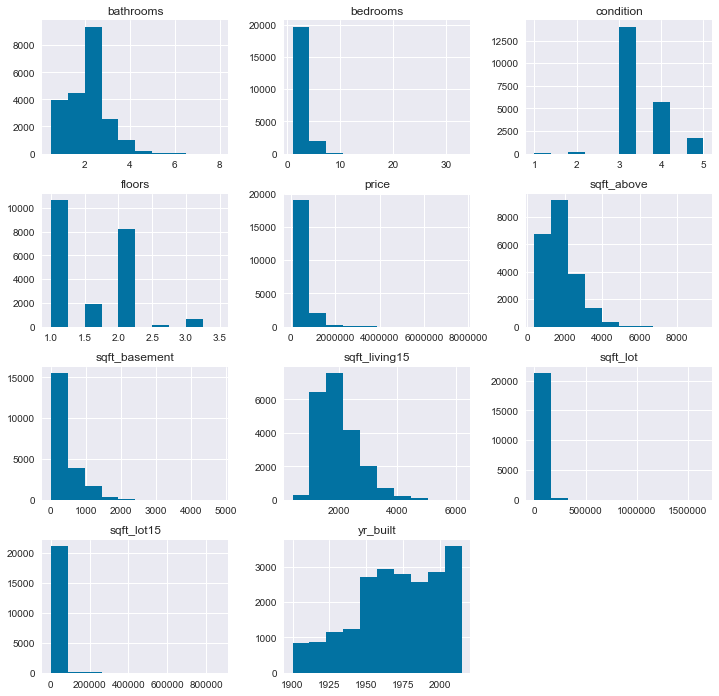

In [24]:
# Look at histograms of the continuous data previously identified
cont_data.hist(figsize= (12, 12))
plt.show()

None of these are normally distributed. I use a log transformation to normalize the distributions of all continuous data, then check the distributions again.

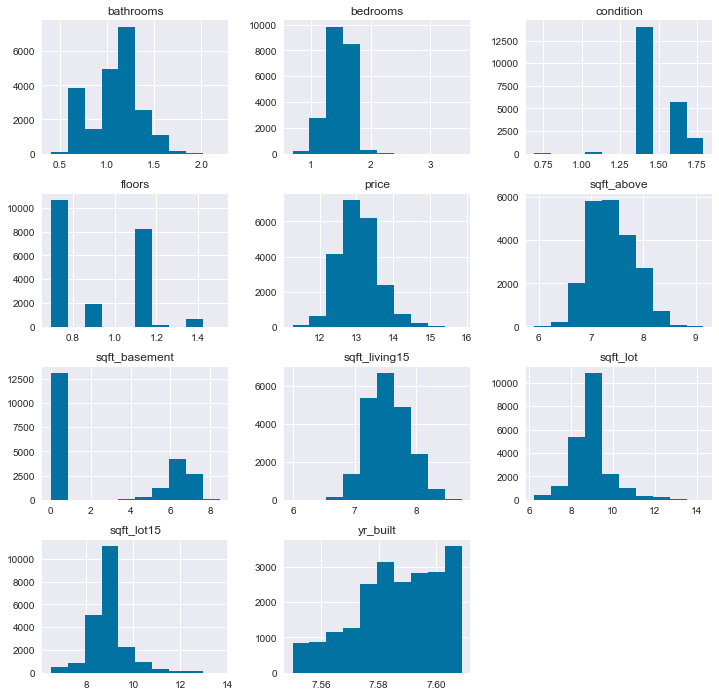

In [25]:
# Take log of continuous data and plot histograms
cont_data_log = np.log1p(cont_data)
cont_data_log.hist(figsize= (12, 12))
plt.show()

With the exception of yr_built, the features look more normally distributed. Next, I check the continutous features for outliers.

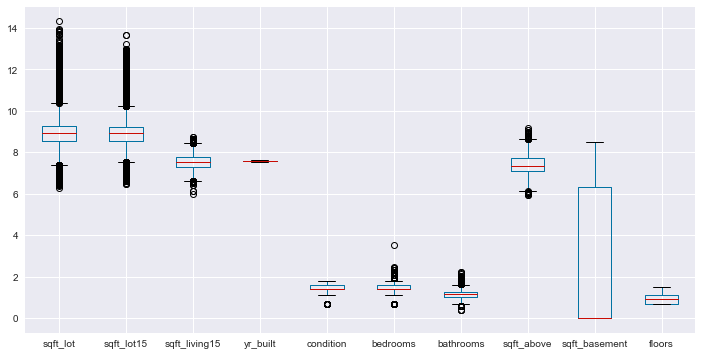

In [26]:
# Check continuous features for outliers. I excluded price as it is the target feature 
# and also on a scale much larger than the others
cont_data_log.drop(['price'], axis=1).boxplot(figsize= (12, 6))

6 of the 10 features have a large number of outliers. Additionally, they are fairly normally distributed. Thus, I use the RobustScaler to scale the explanatory features, which works best with normally distributed data that contains outliers. First, I one hot encode the categorical data, concatenate the continuous and categorical data and split the resulting dataframes into train and test sets. I split the data into training and test sets so the the test data does not leak into the training set during the scaling process, which scales data based on feature median and inner quartile range.

In [27]:
# One hot encode the categoricals, concatenate the ohe categoricals with the log of continuous data
# then split into the target and explanatory features. 
X2, y2 = ut.ohe_concat(cat_data, cont_data_log, categoricals, 'price')
# Split X2 and y2 into training and testing sets
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2, test_size = 0.2, random_state=9)

In [28]:
#use RobustScaler to scale training and testing data 
# Instantiate the RobustScaler
scaler = RobustScaler()
# Scale the training and testing data
X_train2_scaled = pd.DataFrame(scaler.fit_transform(X_train2))
X_test2_scaled = pd.DataFrame(scaler.fit_transform(X_test2))

#### Model 2
Now that the data has been transformed and scaled, I make a second model.

In [29]:
# Instantiate LinnearRegression
linreg2 = LinearRegression()
# Fit the scaled training data
linreg2.fit(X_train2_scaled, y_train2)
# Get predictions on testing data and pring results
ut.predictions(linreg2, X_train2_scaled, X_test2_scaled, y_train2, y_test2)

Training Scores: R2 0.85060, Mean Absolute Error 0.15, Root Mean Squared Error 0.20
Testing Scores: R2 0.84489, Mean Absolute Error 0.15, Root Mean Squared Error 0.21


#### Evaluation 2

The normalization and scaling of the data has increased the R2 values from 0.75 to 0.85. Additionally, the rmse is now only 33% higher than the mae compared to the first model where it was 72% higher. This indicates that there are fewer predictions with large errors. 

In [30]:
# Run an Ordinary Least Squares model and get a results summary
ut.ols_summary(X_train2, y_train2, X2)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.851
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     1224.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:12:30   Log-Likelihood:                 3020.1
No. Observations:               17277   AIC:                            -5878.
Df Residuals:                   17196   BIC:                            -5250.
Df Model:                          80                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
waterfront_Yes     1.0433      0.865      1.207      0.228      -0.651       2.738
renovated_R        0.5542      0.431      1.286      0.198      -0.291       1.399
renovated_RR       0.4891      0.434      1.128      0.259      -0.361       1.339
zipcode_98001     -0.5094      0.018    -28.033      0.000      -0.545      -0.474
zipcode_98002     -0.5102      0.021    -24.722      0.000      -0.551      -0.470
zipcode_98003     -0.4672      0.019    -25.092      0.000      -0.504      -0.431
zipcode_98004      0.6655      0.018     36.521      0.000       0.630       0.701
zipcode_98005      0.2297      0.022     10.415      0.000       0.186       0.273
zipcode_98006      0.2127      0.017     12.596      0.000       0.180       0.246
zipcode_98007      0.1677      0.023      7.288      0.000       0.123       0.213
zipcode_98008      0.2060      0.019     11.109      0.000       0.170       0.242
zipcode_98010     -0.3120      0.027    -11.726      0.000      -0.364      -0.260
zipcode_98011     -0.0690      0.020     -3.369      0.001      -0.109      -0.029
zipcode_98014     -0.2403      0.025     -9.668      0.000      -0.289      -0.192
zipcode_98019     -0.2234      0.022    -10.291      0.000      -0.266      -0.181
zipcode_98022     -0.4545      0.021    -22.153      0.000      -0.495      -0.414
zipcode_98023     -0.5148      0.017    -30.733      0.000      -0.548      -0.482
zipcode_98024     -0.0997      0.028     -3.551      0.000      -0.155      -0.045
zipcode_98027      0.0120      0.017      0.687      0.492      -0.022       0.046
zipcode_98028     -0.0810      0.019     -4.327      0.000      -0.118      -0.044
zipcode_98029      0.1336      0.019      7.218      0.000       0.097       0.170
zipcode_98030     -0.4742      0.020    -24.073      0.000      -0.513      -0.436
zipcode_98031     -0.4422      0.019    -22.908      0.000      -0.480      -0.404
zipcode_98032     -0.4930      0.024    -20.957      0.000      -0.539      -0.447
zipcode_98033      0.3241      0.017     19.123      0.000       0.291       0.357
zipcode_98034      0.0687      0.016      4.237      0.000       0.037       0.100
zipcode_98038     -0.3650      0.017    -21.779      0.000      -0.398      -0.332
zipcode_98039      0.8810      0.034     26.182      0.000       0.815       0.947
zipcode_98040      0.4565      0.019     24.136      0.000       0.419       0.494
zipcode_98042     -0.4517      0.017    -26.781      0.000      -0.485      -0.419
zipcode_98045     -0.1782      0.021     -8.586      0.000      -0.219      -0.137
zipcode_98052      0.1458      0.016      8.908      0.000       0.114       0.178
zipcode_98053      0.0665      0.018      3.634      0.000       0.031       0.102
zipcode_98055     -0.3619      0.019    -19.383      0.000      -0.399      -0.325
zipcode_9805

The skew and kurtosis are both in the normal range, indicating the data no longer skewed and outliers have been minimized. The p-values for almost all features are significant and the p-value for the F-statistic is significant as well, indicating that we can reject the null hypothesis and say that the model fits the data. 

Now I create a residuals plot to see if the data is less heteroskedastic.

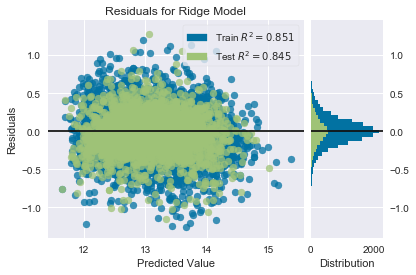

In [31]:
# Instantiate the linear model and visualizer
model = Ridge()
visualizer = ResidualsPlot(model)
# Fit the training data
visualizer.fit(X_train2_scaled, y_train2) 
# Evaluate the model using the test data
visualizer.score(X_test2_scaled, y_test2)  
# Plot the residuals
visualizer.show()

The residuals plot shows that the model is much more homoskedastic. 

### Iteration 3
There are a lot of zipcodes, so I will see if I can cut down the number of categories that need to be one hot encoded by looking for a proxy measure of zipcode. One of the main things about zipcodes as related to housing prices, I think, is the median income of the zipcode, so I will investigate the affect of adding median income of zipcodes into to the model in place of zipcode.

#### Data Preparation 3

I found median income by zipcode data from https://www.communitiescount.org/population-dashboard. Income category cut off numbers also come from the map of income by zipcode on that site.

In [32]:
# Import dataset of King county zipcode and avg incomes
data_zip = pd.read_csv('data/zipcode-income.csv')

data_zip.head()

,Category (Category),Geoname,yr,Latitude (generated),Longitude (generated),Min. LB,Min. pop_n,Min. UB,Income
0,Income,98354,2014-2018,47.26,-122.32,67638.16,"76,270",84901.84,80585.92
1,Income,98288,2014-2018,47.60,-121.34,30357.80,"42,500",54642.20,48571.10
2,Income,98224,2014-2018,47.74,-121.48,19460.68,"41,250",63039.32,52144.66
3,Income,98199,2014-2018,47.65,-122.40,101181.84,"108,328",115474.16,111901.08
4,Income,98198,2014-2018,47.38,-122.31,60796.76,"63,284",65771.24,64527.62


I create a new feature in the data_zip file to include the catorization of median income into low (less than \\$79,000) 'L', middle (\\$79,000-\\$120,000) 'M', high (\\$120,000-\\$140,000) 'H', and very_high (more than \\$140,000) 'VH' based on the previously mentioned map associated with the dataset. 

In [33]:
data_zip['income'] = np.where(data_zip['Income']<79000, 'L', 
                          np.where((data_zip['Income']>=79000) & (data_zip['Income']<120000), 'M', 
                                  np.where(data_zip['Income'] >= 140000, 'VH', 'H')))
                                 
data_zip.head()

,Category (Category),Geoname,yr,Latitude (generated),Longitude (generated),Min. LB,Min. pop_n,Min. UB,Income,income
0,Income,98354,2014-2018,47.26,-122.32,67638.16,"76,270",84901.84,80585.92,M
1,Income,98288,2014-2018,47.60,-121.34,30357.80,"42,500",54642.20,48571.10,L
2,Income,98224,2014-2018,47.74,-121.48,19460.68,"41,250",63039.32,52144.66,L
3,Income,98199,2014-2018,47.65,-122.40,101181.84,"108,328",115474.16,111901.08,M
4,Income,98198,2014-2018,47.38,-122.31,60796.76,"63,284",65771.24,64527.62,L


In [34]:
# Add the both income features (median income and the new categorical income feature) to the 
# Main dataset by maping zipcode to a dictionary of zipcodes and median incomes/income levels
zip_income_cat = dict(zip(data_zip['Geoname'],data_zip['income']))
data['income_cat'] = data['zipcode'].map(zip_income_cat)

zip_income = dict(zip(data_zip['Geoname'],data_zip['Income']))
data['income'] = data['zipcode'].map(zip_income)

data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,renovated,income_cat,income
0,7129300520,10/13/2014,221900.00,3,1.00,1180,5650,1.00,Yes,0.00,...,1955,nan,98178,47.51,-122.26,1340,5650,RR,L,78643.40
1,6414100192,12/9/2014,538000.00,3,2.25,2570,7242,2.00,Yes,0.00,...,1951,1991.00,98125,47.72,-122.32,1690,7639,R,L,66925.06
2,5631500400,2/25/2015,180000.00,2,1.00,770,10000,1.00,Yes,0.00,...,1933,nan,98028,47.74,-122.23,2720,8062,RR,M,109567.92
3,2487200875,12/9/2014,604000.00,4,3.00,1960,5000,1.00,Yes,0.00,...,1965,nan,98136,47.52,-122.39,1360,5000,RR,M,111250.74
4,1954400510,2/18/2015,510000.00,3,2.00,1680,8080,1.00,Yes,0.00,...,1987,nan,98074,47.62,-122.05,1800,7503,RR,VH,176951.32


Next, I check for a normal distribution and outliers of the continuous income feature to see if it would benefit from log transformation and scaling.

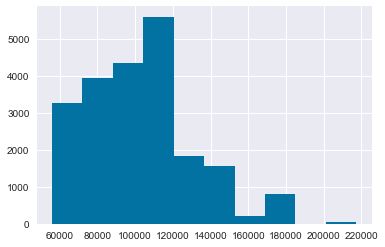

In [35]:
data['income'].hist()

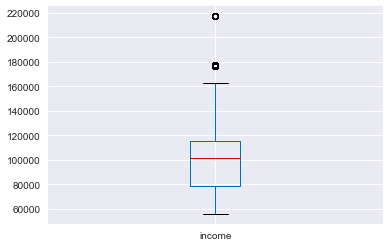

In [36]:
data.boxplot(column='income')

The distribution is skewed and the data contains outliers, so I will treat the the same as the other continuous features.

#### Model 3
I am adding in new features, so re-creating the continuous and categorical features lists to start this model.

In [37]:
# Create datasets with the desired categories- all remain the same as previous model except zipcode and income
categoricals3 = ['waterfront', 'renovated']
continuous3 = ['income', 'sqft_lot',  'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement',
              'yr_built', 'condition', 'price', 'bedrooms', 'floors', 'bathrooms']
cat_data3 = data[categoricals3]
cont_data3 = data[continuous3]     

# Log transform the continuous data
cont_data_log3 = np.log1p(cont_data3)

# One hot encode categorical data, concatenate it with continuos data and split into
# explanatory features and target feature
X3, y3 = ut.ohe_concat(cat_data3, cont_data_log3, categoricals3, 'price')

# Split data into training and testing sets
X_train3, X_test3, y_train3, y_test3 = train_test_split(X3, y3, test_size = 0.2, random_state=94)

# Scale explanatory data using Robust Scaler
scaler3 = RobustScaler()
X_train3_scaled = pd.DataFrame(scaler3.fit_transform(X_train3))
X_test3_scaled = pd.DataFrame(scaler3.fit_transform(X_test3))

# Instanciate LinearRegression
linreg3 = LinearRegression()
# Fit model
linreg3.fit(X_train3_scaled, y_train3)

# Make predictions
ut.predictions(linreg3, X_train3_scaled, X_test3_scaled, y_train3, y_test3)

Training Scores: R2 0.66159, Mean Absolute Error 0.24, Root Mean Squared Error 0.31
Testing Scores: R2 0.64614, Mean Absolute Error 0.24, Root Mean Squared Error 0.31


I re-ran this cell first with neither the zipcode nor the 2 income features to get a baseline R2 value, then added 'zipcode', 'income' and 'income_cat' separately back into the model. A final model included both 'income' and 'zipcode'. Below are the R2, mae & rmse for each of these trials.


##### Results without either zip or income:
Training Scores: R2 0.57569, Mean Absolute Error 0.27, Root Mean Squared Error 0.34  
Testing Scores: R2 0.55569, Mean Absolute Error 0.27, Root Mean Squared Error 0.34
##### Results with median income: 
Training Scores: R2 0.65898, Mean Absolute Error 0.24, Root Mean Squared Error 0.31  
Testing Scores: R2 0.64296, Mean Absolute Error 0.24, Root Mean Squared Error 0.31
##### Results with income as category:
Training Scores: R2 0.65272, Mean Absolute Error 0.24, Root Mean Squared Error 0.31  
Testing Scores: R2 0.63426, Mean Absolute Error 0.25, Root Mean Squared Error 0.31
##### Results with zipcode:
Training Scores: R2 0.85147, Mean Absolute Error 0.15, Root Mean Squared Error 0.20  
Testing Scores: R2 0.84100, Mean Absolute Error 0.15, Root Mean Squared Error 0.21
##### Results with zipcode and median income:
Training Scores: R2 0.85148, Mean Absolute Error 0.15, Root Mean Squared Error 0.20  
Testing Scores: R2 0.84105, Mean Absolute Error 0.15, Root Mean Squared Error 0.21

#### Evaluation 3

Adding the zipcode to the model improves the R2 value by 0.27, while adding the median income to the model improves the R2 by 0.08 and the income categories improve it by 0.07. Thus, while the income is an important aspect of the influence that zipcode has on house prices, it only explains around 25% of the zipcode effect. 
The categorical income feature performed only slightly worse than using the median income as a continuous feature. Adding both income and zipcode produced results almost identical to zipcode alone, indicating that the income category does not add any information not already covered by zipcode. 

In [38]:
# Run an Ordinary Least Squares model and get a results summary
ut.ols_summary(X_train3, y_train3, X3)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.662
Model:                            OLS   Adj. R-squared:                  0.661
Method:                 Least Squares   F-statistic:                     2813.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:12:33   Log-Likelihood:                -4152.0
No. Observations:               17277   AIC:                             8330.
Df Residuals:                   17264   BIC:                             8431.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
waterfront_Yes    53.4990      1.090     49.101      0.000      51.363      55.635
renovated_R       26.7480      0.543     49.272      0.000      25.684      27.812
renovated_RR      26.7510      0.547     48.921      0.000      25.679      27.823
income             0.6201      0.009     66.196      0.000       0.602       0.638
sqft_lot          -0.0236      0.007     -3.475      0.001      -0.037      -0.010
sqft_lot15        -0.0500      0.007     -6.771      0.000      -0.064      -0.036
sqft_living15      0.2970      0.012     25.512      0.000       0.274       0.320
sqft_above         0.6115      0.012     49.265      0.000       0.587       0.636
sqft_basement      0.0474      0.001     48.203      0.000       0.045       0.049
yr_built         -10.6622      0.216    -49.363      0.000     -11.086     -10.239
condition          0.1622      0.018      8.867      0.000       0.126       0.198
bedrooms          -0.2718      0.015    -18.604      0.000      -0.300      -0.243
floors             0.2221      0.017     12.852      0.000       0.188       0.256
bathrooms          0.2688      0.017     15.611      0.000       0.235       0.303
==============================================================================
Omnibus:                      391.894   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              550.860
Skew:                           0.263   Prob(JB):                    2.41e-120
Kurtosis:                       3.699   Cond. No.                     1.37e+17
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 4.38e-28. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

Skew, kurtosis and Prob(F-statistic) all remain similar between the iterations.

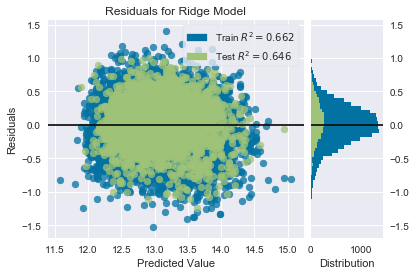

In [39]:
# Instantiate the linear model and visualizer
model = Ridge()
visualizer3 = ResidualsPlot(model)

# Fit the training data
visualizer3.fit(X_train3_scaled, y_train3)  
# Evaluate the model using the test data
visualizer3.score(X_test3_scaled, y_test3)
# Plot the residuals
visualizer3.show()

The skedasticity of the model was also unchanged between interations.

## Iteration 4
I next use recursive feature elimination to see which features might not be needed in the model. 

#### Data Preparation 4

To identify most important features of the model using recursive feature elimination, I will use the same features as before with the zipcode category and will not use income.

In [40]:
categoricals4 = ['waterfront', 'renovated', 'zipcode']
continuous4 = ['sqft_lot',  'sqft_lot15', 'sqft_living15', 'sqft_above', 'sqft_basement',
              'yr_built', 'condition', 'price', 'bedrooms', 'floors', 'bathrooms']
cat_data4 = data[categoricals4]
cont_data4 = data[continuous4] 
# Log transform continuous data
cont_data_log4 = np.log1p(cont_data4)

# One hot encode categorical data, concatenate it with continuos data and split into
# explanatory features and target feature
X4, y4 = ut.ohe_concat(cat_data4, cont_data_log4, categoricals4, 'price')

# Scale explanatory data
scaler4 = RobustScaler()
X4_scaled = pd.DataFrame(scaler4.fit_transform(X4))


#### Model 4

In [41]:
y_data = y4
X_data = X4_scaled
y_dataset = y_data.values
X_dataset = X_data.values

linreg4 = LinearRegression()
# Create the RFE model and select attributes
rfe = RFE(linreg4, 1)
rfe = rfe.fit(X_dataset.data, y_dataset)
# Print summaries for the selection of attributes
rfe_rank = dict(zip(X4.columns, rfe.ranking_))
sorted(rfe_rank.items(), key=lambda x: x[1])

[('zipcode_98002', 1),
 ('zipcode_98168', 2),
 ('zipcode_98032', 3),
 ('zipcode_98001', 4),
 ('zipcode_98023', 5),
 ('zipcode_98148', 6),
 ('zipcode_98188', 7),
 ('zipcode_98198', 8),
 ('zipcode_98003', 9),
 ('zipcode_98178', 10),
 ('zipcode_98030', 11),
 ('zipcode_98055', 12),
 ('zipcode_98031', 13),
 ('zipcode_98042', 14),
 ('zipcode_98022', 15),
 ('zipcode_98106', 16),
 ('zipcode_98146', 17),
 ('zipcode_98092', 18),
 ('zipcode_98058', 19),
 ('zipcode_98108', 20),
 ('zipcode_98038', 21),
 ('zipcode_98133', 22),
 ('zipcode_98118', 23),
 ('zipcode_98010', 24),
 ('zipcode_98056', 25),
 ('zipcode_98155', 26),
 ('zipcode_98126', 27),
 ('zipcode_98014', 28),
 ('zipcode_98166', 29),
 ('zipcode_98019', 30),
 ('zipcode_98045', 31),
 ('zipcode_98125', 32),
 ('zipcode_98028', 33),
 ('zipcode_98059', 34),
 ('zipcode_98070', 35),
 ('zipcode_98011', 36),
 ('zipcode_98034', 37),
 ('zipcode_98024', 38),
 ('zipcode_98065', 39),
 ('zipcode_98136', 40),
 ('zipcode_98144', 41),
 ('zipcode_98072', 42),
 

#### Evaluation 4

The 10 most important features are 'renovated', 'zipcode', 'waterfront', 'sqft_above', 'sqft_basement', 'sqft_living15', 'condition', 'sqft_lot', 'bathrooms'. Then come 'bedrooms', 'floors', yr_built' and sqft_lot15. Cutting the number of bedrooms seems like it wouldn't be good for buyers, but I think the recommendation here is that for a given number of square feet, the number of bedrooms doesn't really matter. 

## Iteration 5
In this iteration, I use only the top 10 important features and try an outlier removal method instead of using the Robust scaler.

#### Data Preparation 5

In [42]:
# Refining the features based on the recursive feature elimination results
categoricals5 = ['waterfront', 'renovated', 'zipcode']
continuous5 = [ 'sqft_lot', 'sqft_living15', 'sqft_above', 'sqft_basement', 'price', 'bathrooms',
              'condition']
cat_data5 = data[categoricals5]
cont_data5 = data[continuous5]

# Log transform continuous data
cont_data_log5 = np.log1p(cont_data5)

# One hot encode categorical data, concatenate it with continuos data and split into
# explanatory features and target feature
X5, y5 = ut.ohe_concat(cat_data5, cont_data_log5, categoricals5, 'price')

# Split data into training and testing sets
X_train5, X_test5, y_train5, y_test5 = train_test_split(X5, y5, test_size = 0.2, random_state=14)



Use LocalOutlierFactor to find outliers using nearest neighbors, then create training datasets that include only inliers. 

In [43]:
# Instantiate LocalOutlierFactor and fit & predict on training data
lof = LocalOutlierFactor()
y_pred = lof.fit_predict(X_train5)

# Outliers are assigned '-1'. Create mask of inlier data
mask = y_pred != -1

# Use mask to eliminate outliers from training data
X_train5, y_train5 = X_train5.iloc[mask, :], y_train5.iloc[mask]

#### Model 5
Use the datasets with outliers removed to create model.

In [44]:
# Instanciate LinearRegression
linreg5 = LinearRegression()
# Fit model
linreg5.fit(X_train5, y_train5)

# Make predictions
ut.predictions(linreg5, X_train5, X_test5, y_train5, y_test5)

Training Scores: R2 0.84982, Mean Absolute Error 0.15, Root Mean Squared Error 0.20
Testing Scores: R2 0.84344, Mean Absolute Error 0.15, Root Mean Squared Error 0.21


In [45]:
# Run an Ordinary Least Squares model and get a results summary
ut.ols_summary(X_train5, y_train5, X5)

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2580: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.850
Model:                            OLS   Adj. R-squared:                  0.849
Method:                 Least Squares   F-statistic:                     1203.
Date:                Mon, 01 Feb 2021   Prob (F-statistic):               0.00
Time:                        19:12:49   Log-Likelihood:                 3082.0
No. Observations:               16237   AIC:                            -6010.
Df Residuals:                   16160   BIC:                            -5417.
Df Model:                          76                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
waterfront_Yes     3.9283      0.037    106.662      0.000       3.856       4.001
renovated_R        1.9956      0.021     95.211      0.000       1.954       2.037
renovated_RR       1.9328      0.019    102.361      0.000       1.896       1.970
zipcode_98001     -0.4740      0.012    -38.605      0.000      -0.498      -0.450
zipcode_98002     -0.4794      0.017    -28.912      0.000      -0.512      -0.447
zipcode_98003     -0.4318      0.014    -31.336      0.000      -0.459      -0.405
zipcode_98004      0.7115      0.013     53.066      0.000       0.685       0.738
zipcode_98005      0.2911      0.018     16.156      0.000       0.256       0.326
zipcode_98006      0.2658      0.011     24.154      0.000       0.244       0.287
zipcode_98007      0.2014      0.020     10.219      0.000       0.163       0.240
zipcode_98008      0.2470      0.014     17.582      0.000       0.219       0.275
zipcode_98010     -0.2617      0.022    -11.874      0.000      -0.305      -0.218
zipcode_98011     -0.0368      0.017     -2.215      0.027      -0.069      -0.004
zipcode_98014     -0.1859      0.022     -8.489      0.000      -0.229      -0.143
zipcode_98019     -0.1717      0.017    -10.180      0.000      -0.205      -0.139
zipcode_98022     -0.4013      0.015    -25.911      0.000      -0.432      -0.371
zipcode_98023     -0.4746      0.011    -44.966      0.000      -0.495      -0.454
zipcode_98024     -0.0672      0.027     -2.454      0.014      -0.121      -0.014
zipcode_98027      0.0533      0.011      4.725      0.000       0.031       0.075
zipcode_98028     -0.0460      0.014     -3.285      0.001      -0.073      -0.019
zipcode_98029      0.1884      0.013     14.346      0.000       0.163       0.214
zipcode_98030     -0.4221      0.015    -28.616      0.000      -0.451      -0.393
zipcode_98031     -0.4125      0.014    -28.904      0.000      -0.440      -0.385
zipcode_98032     -0.4817      0.021    -22.857      0.000      -0.523      -0.440
zipcode_98033      0.3638      0.011     32.182      0.000       0.342       0.386
zipcode_98034      0.0970      0.010      9.557      0.000       0.077       0.117
zipcode_98038     -0.3196      0.010    -33.414      0.000      -0.338      -0.301
zipcode_98039      0.9098      0.035     26.135      0.000       0.842       0.978
zipcode_98040      0.4942      0.014     34.460      0.000       0.466       0.522
zipcode_98042     -0.4070      0.010    -41.509      0.000      -0.426      -0.388
zipcode_98045     -0.1417      0.016     -9.110      0.000      -0.172      -0.111
zipcode_98052      0.1924      0.010     19.191      0.000       0.173       0.212
zipcode_98053      0.1361      0.012     11.363      0.000       0.113       0.160
zipcode_98055     -0.2987      0.014    -21.212      0.000      -0.326      -0.271
zipcode_9805

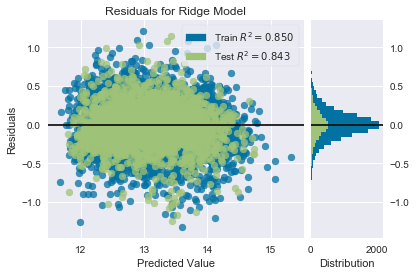

In [46]:
# Instantiate the linear model and visualizer
model = Ridge()
visualizer5 = ResidualsPlot(model)

# Fit the training data
visualizer5.fit(X_train5, y_train5)  
# Evaluate the model using the test data
visualizer5.score(X_test5, y_test5)
# Plot the residuals
visualizer5.show()

#### Evaluation 5

Based on R2, mae, rmse, skewness, kurtosis, Prob(F-statistic) and the residuals plot, this model works as well as the one using Robust scaling to deal with outliers. 

#### Analysis of Model 5
To analyze this final model, I will look at the coefficients of the features to see how each feature affects the final house price.

In [47]:
# Create dictionary of featurs and coefficients
coef_dict5 = dict(zip(X5.columns, linreg5.coef_))
sorted(coef_dict5.items(), key=lambda x: x[1], reverse=True)

[('zipcode_98039', 0.8536725262229927),
 ('zipcode_98004', 0.655353949085226),
 ('zipcode_98109', 0.6265058052589899),
 ('zipcode_98112', 0.6179253006858387),
 ('zipcode_98119', 0.5809743836772308),
 ('zipcode_98102', 0.5483655806988503),
 ('zipcode_98105', 0.522897379711446),
 ('sqft_above', 0.5100905835786806),
 ('zipcode_98199', 0.462152028317635),
 ('zipcode_98107', 0.45892866702569807),
 ('zipcode_98040', 0.4380979375334405),
 ('zipcode_98103', 0.4236209957565804),
 ('zipcode_98122', 0.42265568337938725),
 ('zipcode_98117', 0.4097326662702798),
 ('zipcode_98115', 0.38391470819734963),
 ('zipcode_98116', 0.3834404378310629),
 ('zipcode_98033', 0.30763800068389996),
 ('zipcode_98136', 0.29500596612342117),
 ('sqft_living15', 0.2911653662341684),
 ('zipcode_98144', 0.26446112820784856),
 ('zipcode_98005', 0.2349987440473743),
 ('condition', 0.21795421641248627),
 ('zipcode_98006', 0.20966003276023676),
 ('zipcode_98008', 0.19085869950892714),
 ('zipcode_98177', 0.172320478175029),
 (

To determine how zipcode affects house prices, I create a dictionary of the zipcodes and the exponantiated coefficients. The categorical zipcode features were not log transformed, while the target price feature was log transformed. The exponantiated coefficient represents the percent difference from the average similar house for that zipcode.

In [48]:
# Create the dictionary for zipcodes & transformed coefficients
zip_dict = {}
# Also create a dictionary for the other features minus the zipcodes.
# This will make a cleaner dictionary to use for the rest of the analysis.
feature_dict = {}
# Use a for loop to exponantiate coefficients of zipcodes and place the zipcode & new coefficient in the dictionary
for key, value in coef_dict5.items():
    if 'zipcode' in key: 
        multiplier = round((np.exp(value) - 1)*100, 2)
        zip_dict[key] = multiplier
    else:
        feature_dict[key] = value
    
sorted(zip_dict.items(), key=lambda x: x[1], reverse=True)

[('zipcode_98039', 134.83),
 ('zipcode_98004', 92.58),
 ('zipcode_98109', 87.11),
 ('zipcode_98112', 85.51),
 ('zipcode_98119', 78.78),
 ('zipcode_98102', 73.04),
 ('zipcode_98105', 68.69),
 ('zipcode_98199', 58.75),
 ('zipcode_98107', 58.24),
 ('zipcode_98040', 54.98),
 ('zipcode_98103', 52.75),
 ('zipcode_98122', 52.6),
 ('zipcode_98117', 50.64),
 ('zipcode_98115', 46.8),
 ('zipcode_98116', 46.73),
 ('zipcode_98033', 36.02),
 ('zipcode_98136', 34.31),
 ('zipcode_98144', 30.27),
 ('zipcode_98005', 26.49),
 ('zipcode_98006', 23.33),
 ('zipcode_98008', 21.03),
 ('zipcode_98177', 18.81),
 ('zipcode_98126', 18.29),
 ('zipcode_98007', 15.63),
 ('zipcode_98052', 14.6),
 ('zipcode_98029', 14.14),
 ('zipcode_98125', 10.99),
 ('zipcode_98053', 8.32),
 ('zipcode_98074', 7.54),
 ('zipcode_98075', 6.68),
 ('zipcode_98034', 4.18),
 ('zipcode_98118', 1.76),
 ('zipcode_98133', 1.23),
 ('zipcode_98027', -0.28),
 ('zipcode_98155', -3.92),
 ('zipcode_98072', -5.45),
 ('zipcode_98106', -7.24),
 ('zipcod

 To visualize the zipcode data, I will add the zipcode coefficient to the data_zip dataframe and use the coefficient and latitude and longitude data to map the coeffients over a King County map.

In [49]:
# To map the coefficients to data_zip, I need to remove the 'zipcode_' from the keys
# and then change the zipcodes to integers.

# Create a new dictionary to store new key value pairs
zip_dict2 = {}
# For loop to take only the number for the new keys
for key, value in zip_dict.items():
    key = key[-5:]
    zip_dict2[key] = value
        
 # Change dtype of keys to int   
zip_dict2 = {int(k):v for k,v in zip_dict2.items()}        

In [50]:
# Map a new column, 'price_effect' to the dictionary
data_zip['price_effect'] = data_zip['Geoname'].replace(zip_dict2)

# 2 zipcodes didn't have a corresponding zip in the dictionary and the coefficient was 
# set to the zipcode. Change it to zero
data_zip.loc[data_zip['price_effect'] == data_zip['Geoname'], 'price_effect'] = 0

# Rename the latitude and longitude columns for ease
data_zip.rename(columns= {'Latitude (generated)': 'lat', 'Longitude (generated)': 'long'}, inplace=True)
data_zip.rename(columns= {'Latitude (generated)': 'lat', 'Longitude (generated)': 'long'}, inplace=True)

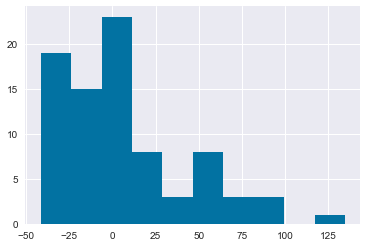

In [51]:
# Histogram of coefficients to help decide colors for mapping
data_zip['price_effect'].hist()

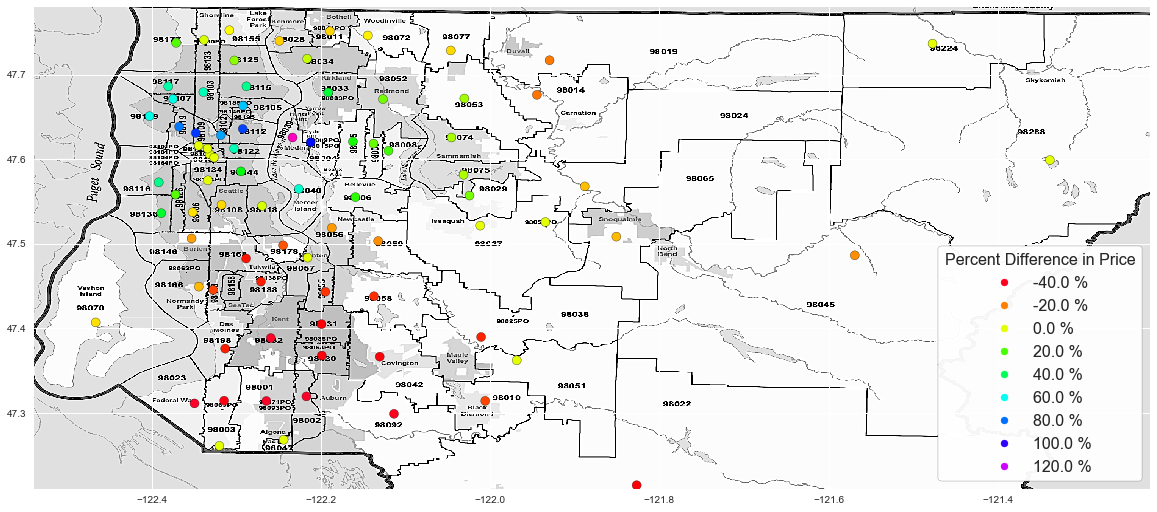

In [52]:
# Load map for figure background, establish figure
img = plt.imread("images/zipcodes-map.png")
fig, ax = plt.subplots(figsize=(20, 20))

# Set axis limits to match edges of map
ax.set_ylim(47.21, 47.78)
ax.set_xlim(-122.54, -121.22)

# Set image as background, with edge placement at the axis limits
ax.imshow(img, extent=[-122.54, -121.22, 47.21, 47.78])
# Plot lat and long for each zipcode, with hue as coefficient on a gradient
scatter = ax.scatter(data_zip['long'], data_zip['lat'], c=data_zip['price_effect'], s=80, cmap='gist_rainbow', 
           edgecolors='black')

# Create and format legend
kw = dict( fmt="{x} %")
legend1 = ax.legend(*scatter.legend_elements(**kw), frameon = 1,
                    loc="lower right", prop={'size': 16}, title="Percent Difference in Price", title_fontsize=16)
ax.add_artist(legend1)
frame = legend1.get_frame()
frame.set_color('white')
frame.set_edgecolor('grey')

# Save and plot figure
plt.savefig("images/zipcode_effect.png", bbox_inches='tight')
plt.show()

Unsuprisingly, the zipcode with the largest impact on house prices, 98039 (middle of map in magenta), is home to Steve Ballmer, Bill Gates and Jeff Bezos. Living in their zipcode will increase the cost of a house by 135% compared to a similar house in the average neighborhood. The most expensive zipcodes cross Seattle proper just north of downtown, then prices gradually decrease as you go outward in both directions, with north Seattle and suburbs more expensive than sounth Seattle and suburbs. Zipcode has little influence on home price in the downtown core and just to the south. The zipcodes with the most negative impact on price are mostly suburbs to the south of Seattle.

In [53]:
# Look at the rest of the features
sorted(feature_dict.items(), key=lambda x: x[1], reverse=True)

[('sqft_above', 0.5100905835786806),
 ('sqft_living15', 0.2911653662341684),
 ('condition', 0.21795421641248627),
 ('bathrooms', 0.15199248674443538),
 ('sqft_lot', 0.06814378487140874),
 ('renovated_R', 0.03139911580692995),
 ('sqft_basement', 0.022643807238440516),
 ('waterfront_Yes', -9.43127364069541e-18),
 ('renovated_RR', -0.03139911580693716)]

Like zipcodes, the renovation and waterfront categories were not log transformed. The other features were log transformed. Next I create another dictionary with these coefficients appropriately transformed for the feature.

In [54]:
# Create dictionary for transformed coefficients
feat_coef = {}
cat_feat = ['renovated', 'waterfront']
#use a for loop to exponantiate coefficients of zipcodes and place the zipcode & new coefficient in the dictionary
for key, value in feature_dict.items():
    if any(x in key for x in cat_feat): 
        multiplier = round((np.exp(value) - 1)*100, 2)
        feat_coef[key] = multiplier
    else:
        multiplier = round((1.1**value - 1)*100, 2)
        feat_coef[key] = multiplier
    
sorted(feat_coef.items(), key=lambda x: x[1], reverse=True)

[('sqft_above', 4.98),
 ('renovated_R', 3.19),
 ('sqft_living15', 2.81),
 ('condition', 2.1),
 ('bathrooms', 1.46),
 ('sqft_lot', 0.65),
 ('sqft_basement', 0.22),
 ('waterfront_Yes', 0.0),
 ('renovated_RR', -3.09)]

For the continuous features, the value in this dictionary is the percent increase due to a 10% increase in the feature. 

/Users/cindyreiner/opt/anaconda3/envs/learn-env/lib/python3.6/site-packages/ipykernel_launcher.py:18: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


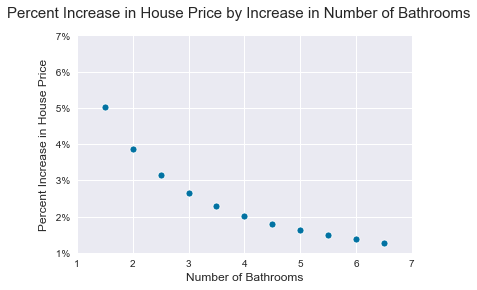

In [60]:
# Plot how an increase in number of bathrooms affects house price.

# List of possible number of bathrooms
bath_num = [1, 1.5, 2, 2.5, 3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5]
# List to contain percent increase in price
increase = []
for num in bath_num:
    # Calculate percent increase in adding a half bath.
    pct_increase = (0.5 / num) + 1
    # Use the bathroom coef to calculate the corresponding increase in price
    transform = (pct_increase**0.17 - 1)*100
    increase.append(transform)

# Plot percent increase in price with bathroom number
plt.suptitle('Percent Increase in House Price by Increase in Number of Bathrooms', fontsize=15)
plt.xlabel('Number of Bathrooms', fontsize=12)
plt.ylabel('Percent Increase in House Price', fontsize=12)
ax = plt.axes()
ax.set(ylim=(1, 7),xlim=(1, 7)) 
ax.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x: .0f}%'))
sns.scatterplot(bath_num, increase)
plt.subplots_adjust(top=0.88) 

# Save and plot
plt.savefig("images/increasebybathroom.png", bbox_inches='tight')
plt.show()

The largest percent increases in house price comes in the jump from 1 to 2 to 3 bathrooms with further bathrooms having less of an effect on price percentage-wise. 

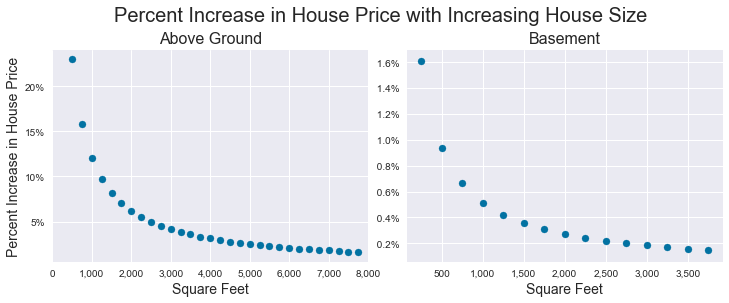

In [59]:
# Plot how an increase in square feet affects house price.

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 4))
# List to contain percent increase in price
increase_abv = []
for num in range(500, 8000, 250):
    # Calculate percent increase in adding a half bath.
    pct_increase = (250 / num) + 1
    # Use the bathroom coef to calculate the corresponding increase in price
    transform = (pct_increase**0.51 - 1)*100
    increase_abv.append(transform)
    
increase_bsmt = []    
for num in range(250, 4000, 250):
    # Calculate percent increase in adding a half bath.
    pct_increase = (250 / num) + 1
    # Use the bathroom coef to calculate the corresponding increase in price
    transform = (pct_increase**0.023 - 1)*100
    increase_bsmt.append(transform)
    
fig.suptitle('Percent Increase in House Price with Increasing House Size', fontsize=20)
fig.tight_layout()
fig.subplots_adjust(top=0.83)

ax1.set_title('Above Ground', fontsize=16)
ax1.set_xlabel('Square Feet', fontsize=14)
ax1.set_ylabel('Percent Increase in House Price', fontsize=14)
ax1.set_xlim(0, 8000)
ax1.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:.0f}%'))
ax1.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax1.scatter(range(500, 8000, 250), increase_abv)

ax2.set_title('Basement', fontsize=16)
ax2.set_xlabel('Square Feet', fontsize=14)
ax2.set_ylabel
ax2.yaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x: .1f}%'))
ax2.xaxis.set_major_formatter(plt.matplotlib.ticker.StrMethodFormatter('{x:,.0f}'))
ax2.scatter(range(250, 4000, 250), increase_bsmt)

plt.savefig("images/increasebysqft.png", bbox_inches='tight')
plt.show()

The above ground square footage has a much larger impact on house price than adding space in the basement. House price increases dramatically in going from 500 to 2500 square feet above ground, then levels off a bit. 

## Conclusions


Home buyers in this market who are looking to maximize their dollars should carefully consider the locations in which they search. This will make the biggest impact on how far their budget will go. The second most important factor in housing is the square footage of the house. If they have a particular size house in mind, they could maximize space per dollar by looking for a house with a large basement, as basement space is much less expensive than above ground space. King County, and Seattle in particular, are very hilly, so they might look for a daylight basement to get the extra, less expensive space without the darkness associated with a typical basement. Finally, if the buyers are set on two or three bathrooms, it would be worth finding a one bathroom house with space to add more themselves.

This model can account for 85% of the variability in house prices in King County, which is a 10% increase from my initial model.  I think the model is a decent start, but could be improved by doing more to work out the best transformation method for each feature. Additionally, I would like to try different scaling methods. 

Zipcode has an outsized effect on the model, so I would like to explore other aspects of zipcode to see what might contribute to the effect. Perhaps building a model for each zipcode would be a way to keep the zipcode from having too much influence on the model.

Seattle's population growth and corresponding demand for housing has lead to a change in zoning laws that allow "Accesory Dwelling Units" to be built on lots already having a main house. It would be interesting to see how these additional units will impact the value of homes with and without them. It seems like additional space would increase value, but perhaps the exclusivity factor of having a private yard will also play a role in pricing. 

The next step for this model is to build out an application that will allow buyers to use sliders to change house features- location, bathrooms, square footage, etc- and see the effect those changes have on house price.

This analysis would benefit from more recent data and as well as the previously mentioned more fine tuning of the data. Overall, it does a decent job of predicting house prices in King County in the years 2014 & 2015.

